In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2020-12-27T17:00:00,15,Campania,1440,95,1535,78540,80075,-488,310,...,8.0,3382.0,974.0,-494.0,6.19,1.92,9.17,31.83,-3.06,-0.61
307,2020-12-28T17:00:00,15,Campania,1422,98,1520,77776,79296,-779,433,...,33.0,4650.0,1967.0,-764.0,6.45,1.92,9.31,22.01,3.16,-0.97
308,2020-12-29T17:00:00,15,Campania,1402,97,1499,76992,78491,-805,625,...,46.0,6849.0,2413.0,-784.0,6.47,1.91,9.13,25.90,-1.02,-1.02
309,2020-12-30T17:00:00,15,Campania,1357,102,1459,76152,77611,-880,930,...,47.0,11985.0,7594.0,-840.0,6.99,1.88,7.76,12.25,5.15,-1.12


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 31, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1554
Nuovi tamponi: 19003.0
Percentuale nuovi positivi/nuovi tamponi: 8.200000000000001 %
Nuovi guariti: 1878.0
Nuovi deceduti: 32.0
Variazione positivi ricoverati con sintomi: -32.0
Variazione positivi in terapia intensiva: 11.0
Variazione positivi in isolamento dimiciliare: -335.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 31, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-01T17:00:00,15,Campania,1416,170,1586,45592,47178,3448,3860,...,3.0,21785.0,17865.0,3433.0,10.72,3.36,17.72,21.61,1.19,7.88
1,2020-11-02T17:00:00,15,Campania,1486,171,1657,47113,48770,1592,2861,...,24.0,15632.0,10648.0,1521.0,10.32,3.40,18.30,26.87,0.59,3.37
2,2020-11-03T17:00:00,15,Campania,1497,227,1724,48995,50719,1949,2971,...,24.0,13801.0,8469.0,1882.0,13.17,3.40,21.53,35.08,32.75,4.00
3,2020-11-04T17:00:00,15,Campania,1569,175,1744,52744,54488,3769,4181,...,15.0,21684.0,17469.0,3749.0,10.03,3.20,19.28,23.93,-22.91,7.43
4,2020-11-05T17:00:00,15,Campania,1608,174,1782,56266,58048,3560,3888,...,17.0,19568.0,14963.0,3522.0,9.76,3.07,19.87,25.98,-0.57,6.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-27T17:00:00,15,Campania,1440,95,1535,78540,80075,-488,310,...,8.0,3382.0,974.0,-494.0,6.19,1.92,9.17,31.83,-3.06,-0.61
57,2020-12-28T17:00:00,15,Campania,1422,98,1520,77776,79296,-779,433,...,33.0,4650.0,1967.0,-764.0,6.45,1.92,9.31,22.01,3.16,-0.97
58,2020-12-29T17:00:00,15,Campania,1402,97,1499,76992,78491,-805,625,...,46.0,6849.0,2413.0,-784.0,6.47,1.91,9.13,25.90,-1.02,-1.02
59,2020-12-30T17:00:00,15,Campania,1357,102,1459,76152,77611,-880,930,...,47.0,11985.0,7594.0,-840.0,6.99,1.88,7.76,12.25,5.15,-1.12


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

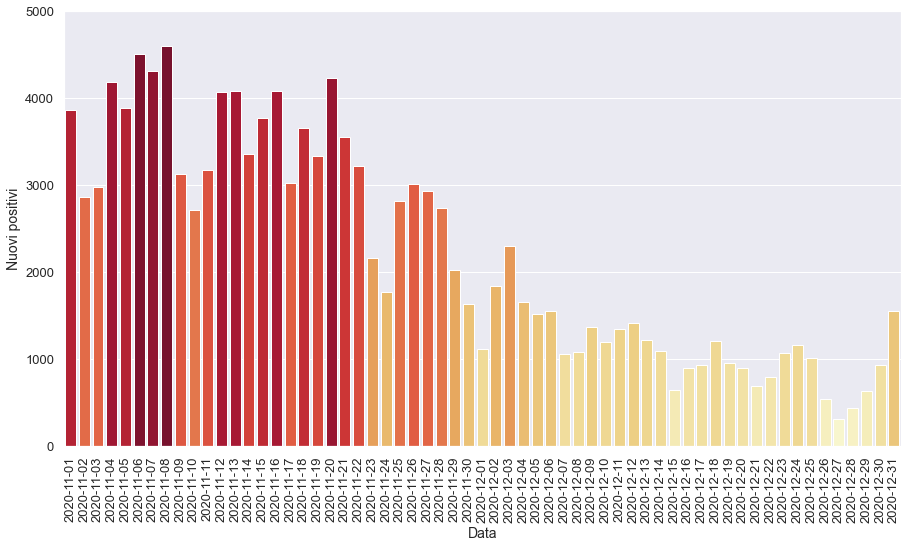

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

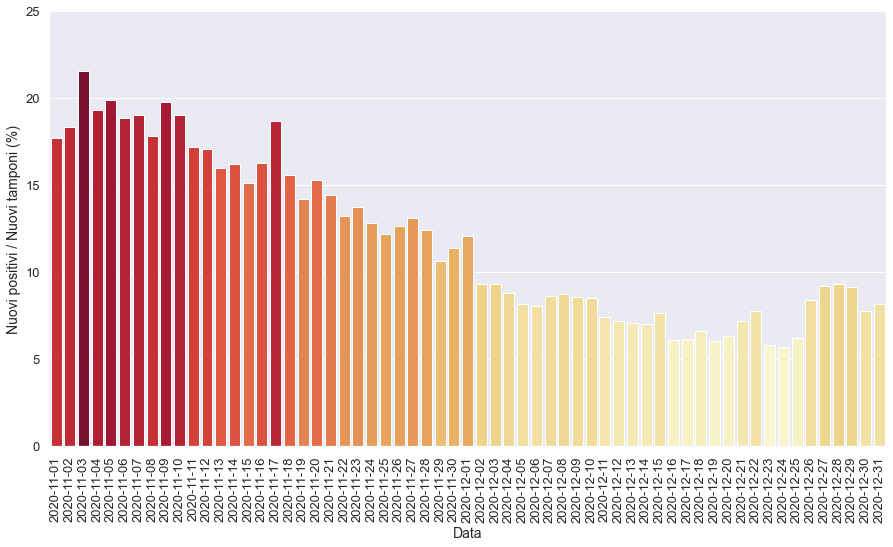

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

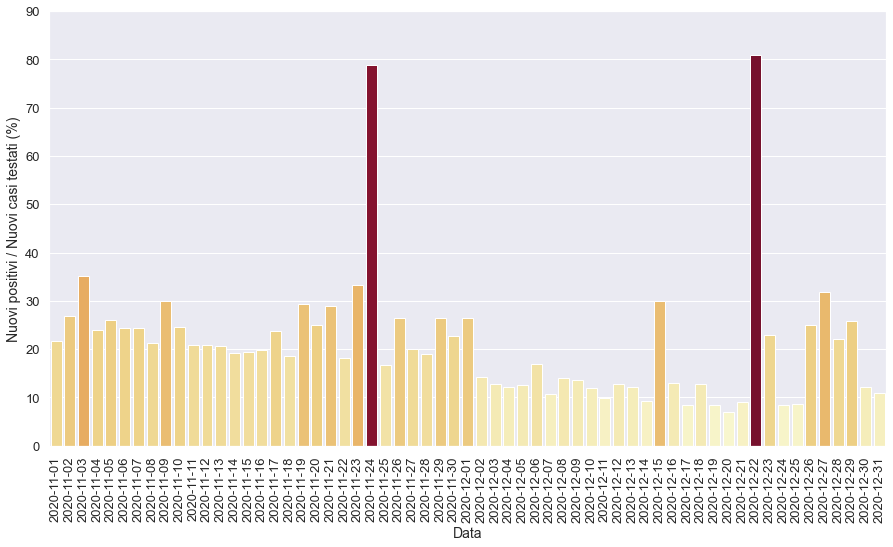

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

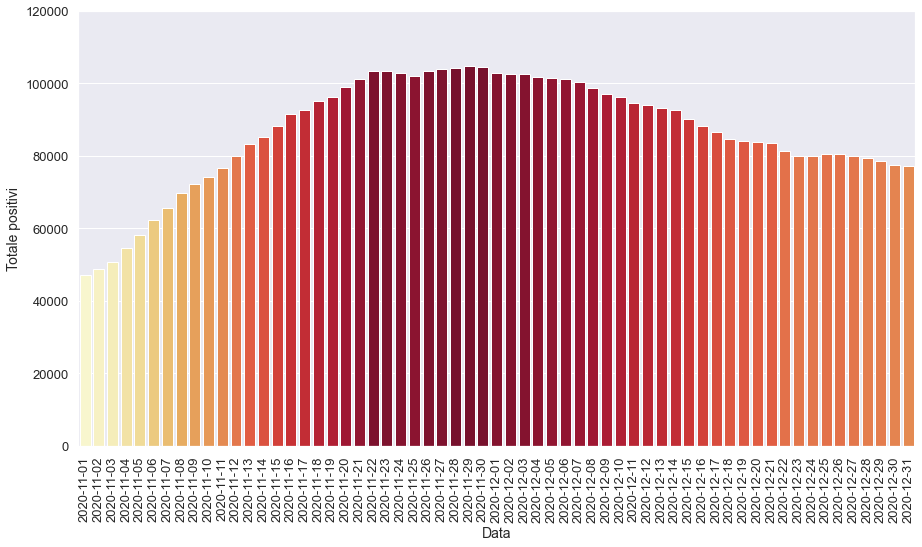

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

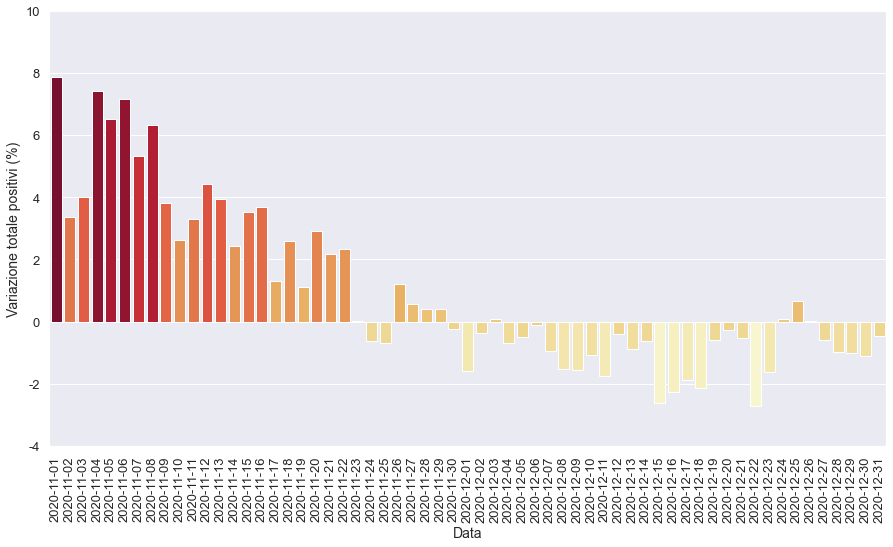

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

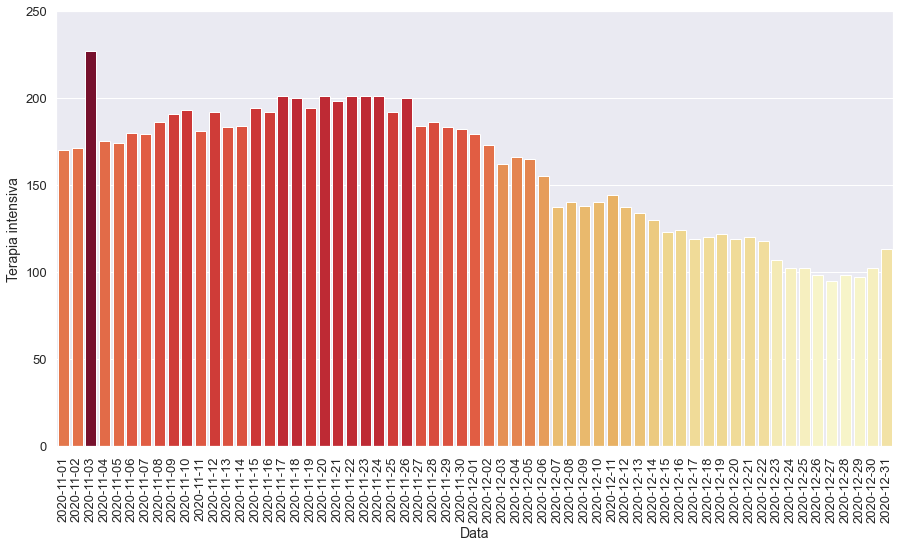

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

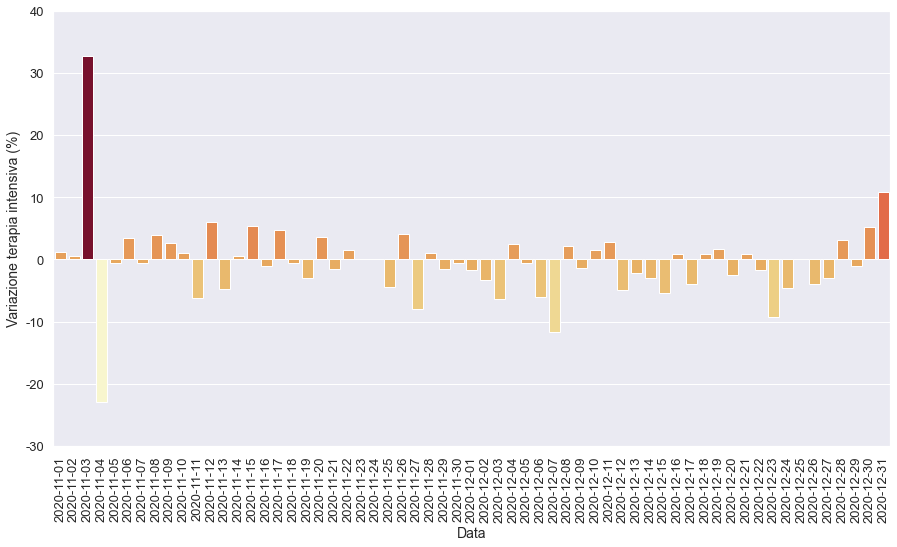

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

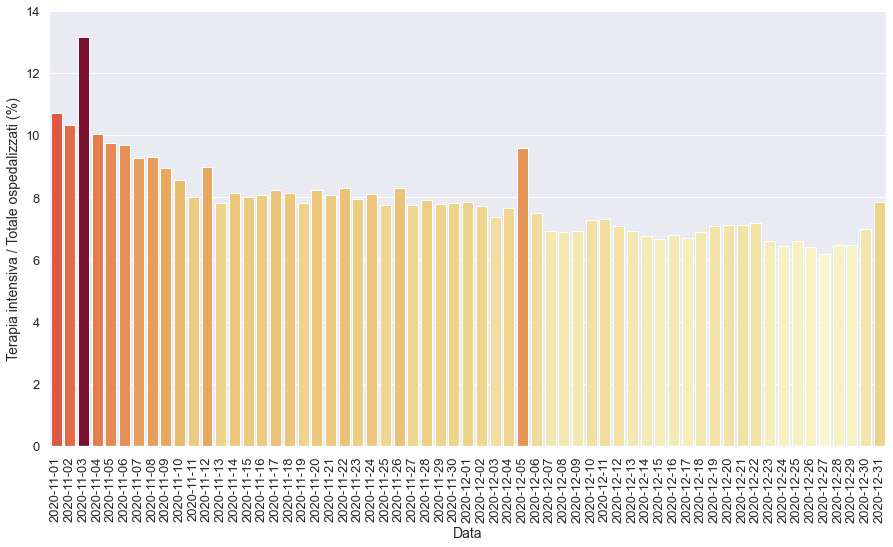

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

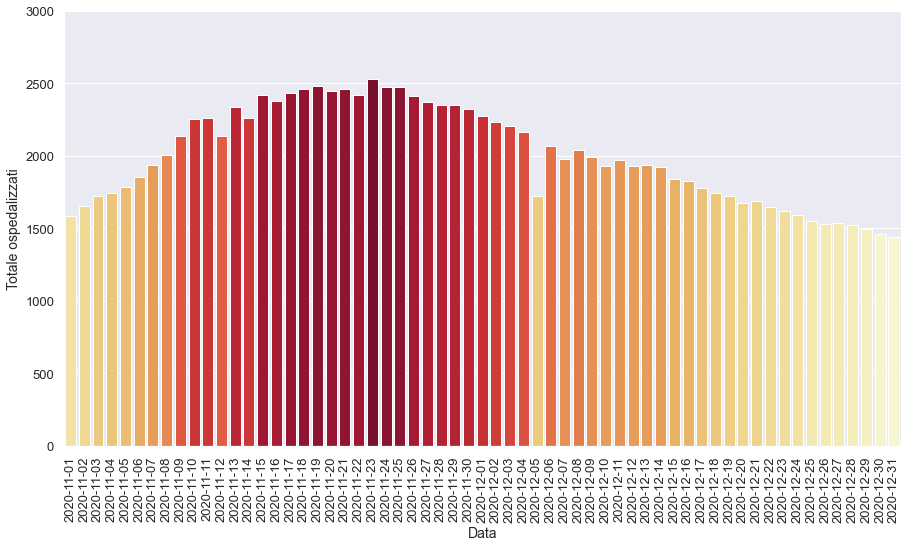

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

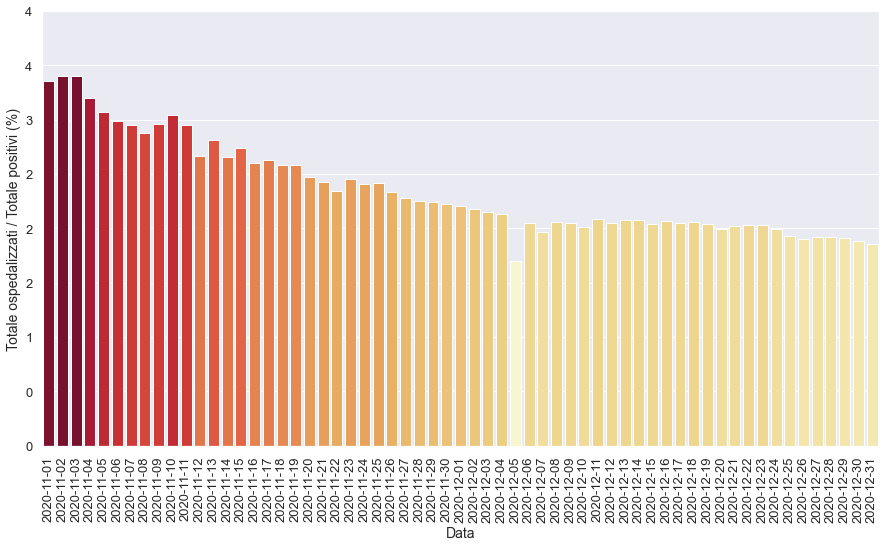

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

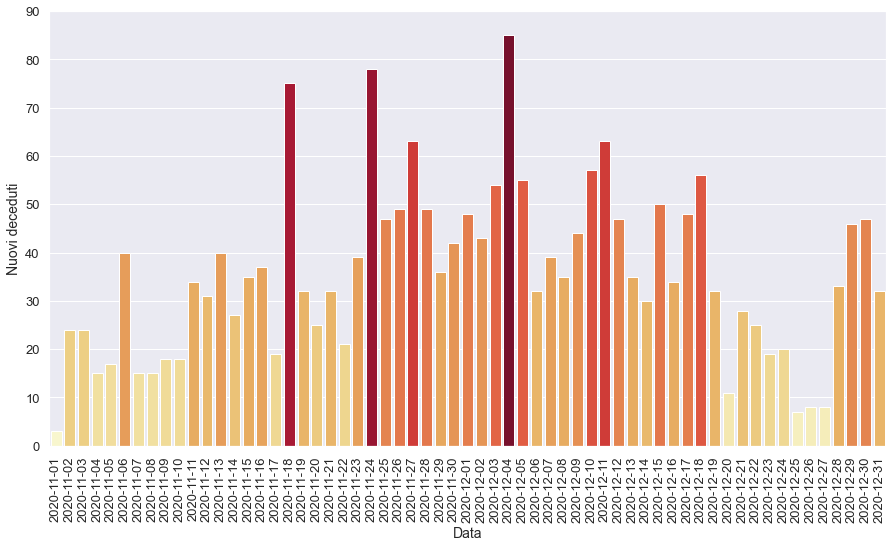

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

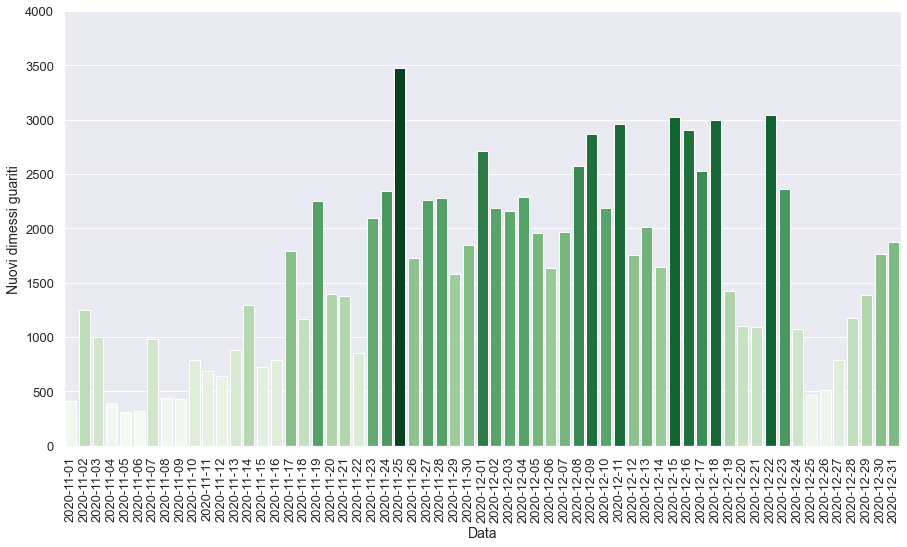

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-01T17:00:00,15,Campania,2099,179,2278,100601,102879,-1648,1113,...,48.0,9241.0,4219.0,-1603.0,7.86,2.21,12.04,26.38,-1.65,-1.58
1,2020-12-02T17:00:00,15,Campania,2064,173,2237,100258,102495,-384,1842,...,43.0,19759.0,12964.0,-343.0,7.73,2.18,9.32,14.21,-3.35,-0.37
2,2020-12-03T17:00:00,15,Campania,2041,162,2203,100371,102574,79,2295,...,54.0,24709.0,17876.0,113.0,7.35,2.15,9.29,12.84,-6.36,0.08
3,2020-12-04T17:00:00,15,Campania,1999,166,2165,99691,101856,-718,1651,...,85.0,18733.0,13631.0,-680.0,7.67,2.13,8.81,12.11,2.47,-0.70
4,2020-12-05T17:00:00,15,Campania,1558,165,1723,99638,101361,-495,1521,...,55.0,18636.0,12036.0,-53.0,9.58,1.70,8.16,12.64,-0.60,-0.49
5,2020-12-06T17:00:00,15,Campania,1916,155,2071,99172,101243,-118,1552,...,32.0,19313.0,9204.0,-466.0,7.48,2.05,8.04,16.86,-6.06,-0.12
6,2020-12-07T17:00:00,15,Campania,1840,137,1977,98318,100295,-948,1060,...,39.0,12330.0,9861.0,-854.0,6.93,1.97,8.60,10.75,-11.61,-0.94
7,2020-12-08T17:00:00,15,Campania,1898,140,2038,96727,98765,-1530,1080,...,35.0,12360.0,7643.0,-1591.0,6.87,2.06,8.74,14.13,2.19,-1.53
8,2020-12-09T17:00:00,15,Campania,1852,138,1990,95223,97213,-1552,1361,...,44.0,15872.0,10036.0,-1504.0,6.93,2.05,8.57,13.56,-1.43,-1.57
9,2020-12-10T17:00:00,15,Campania,1789,140,1929,94236,96165,-1048,1198,...,57.0,14106.0,10002.0,-987.0,7.26,2.01,8.49,11.98,1.45,-1.08


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

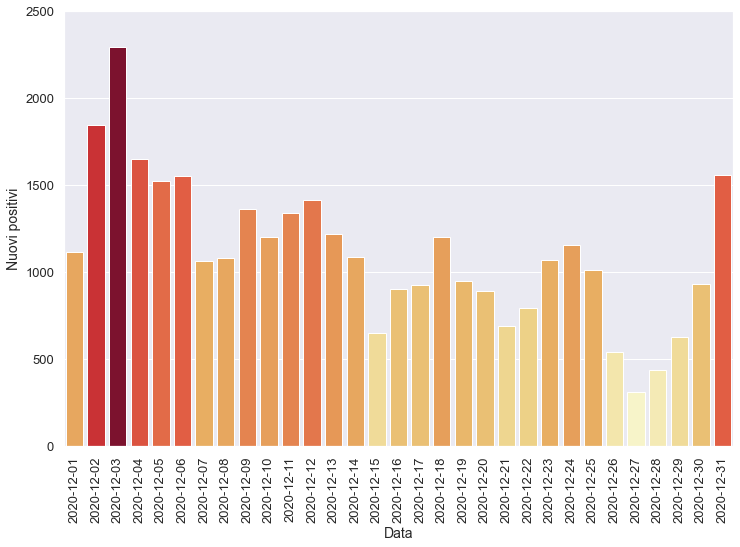

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

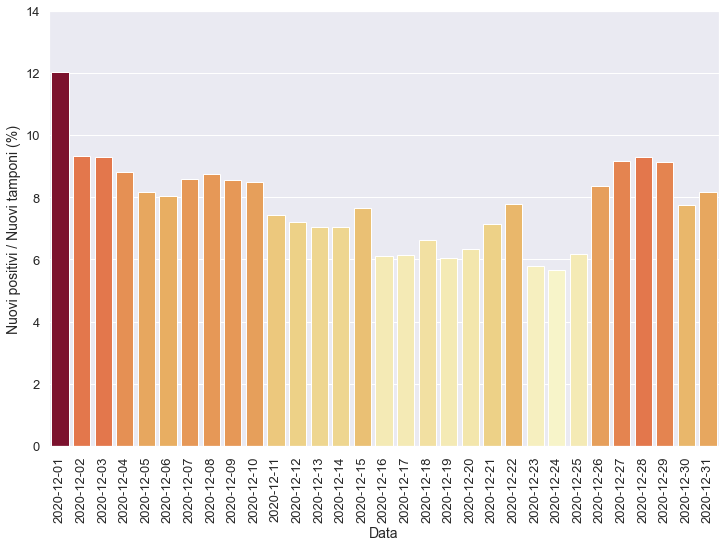

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

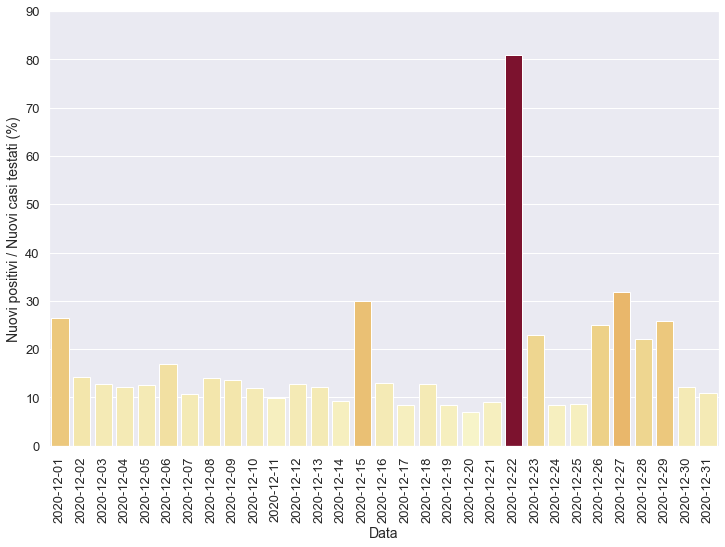

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

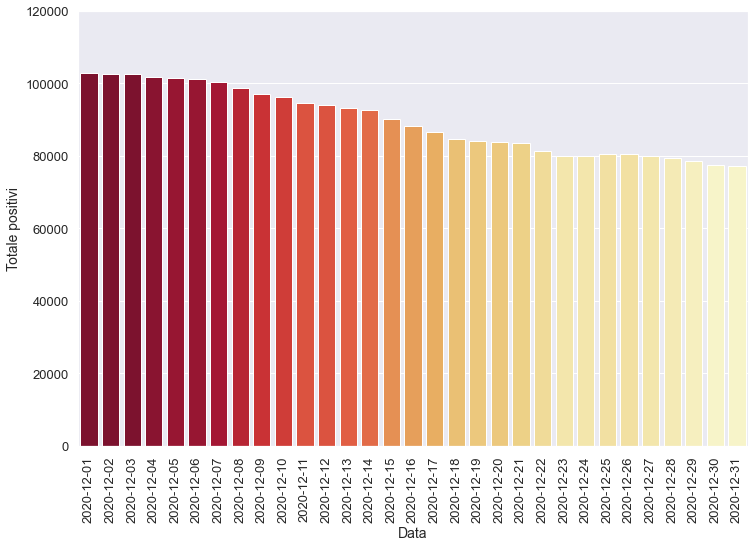

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

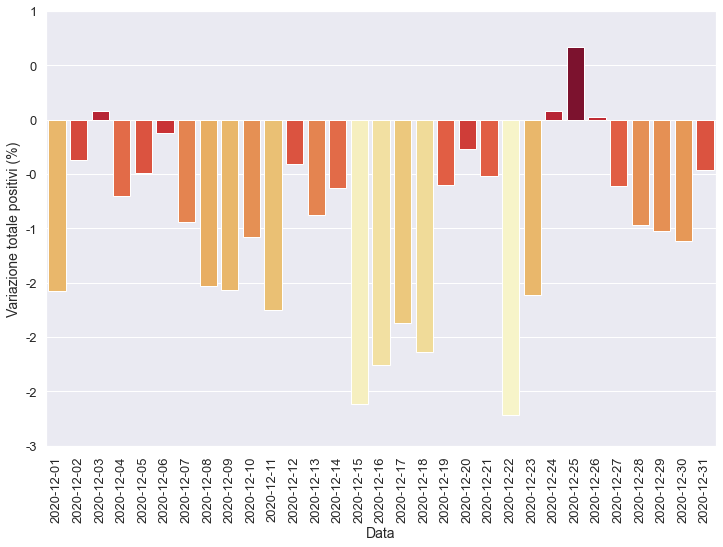

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

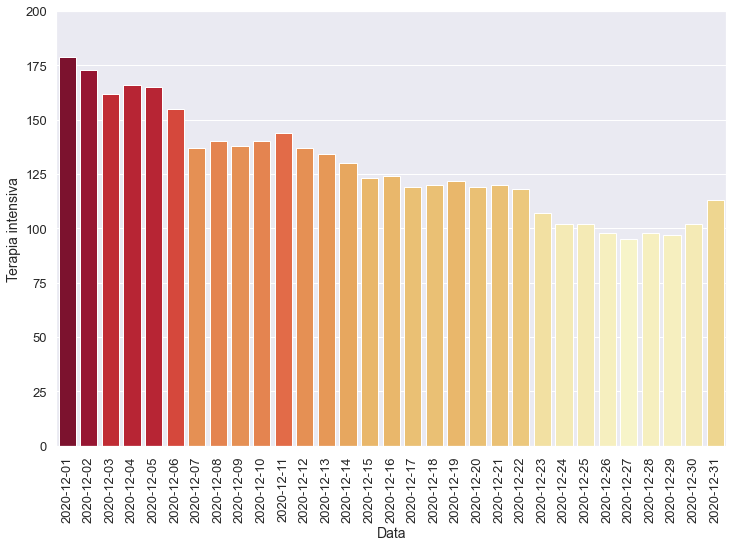

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

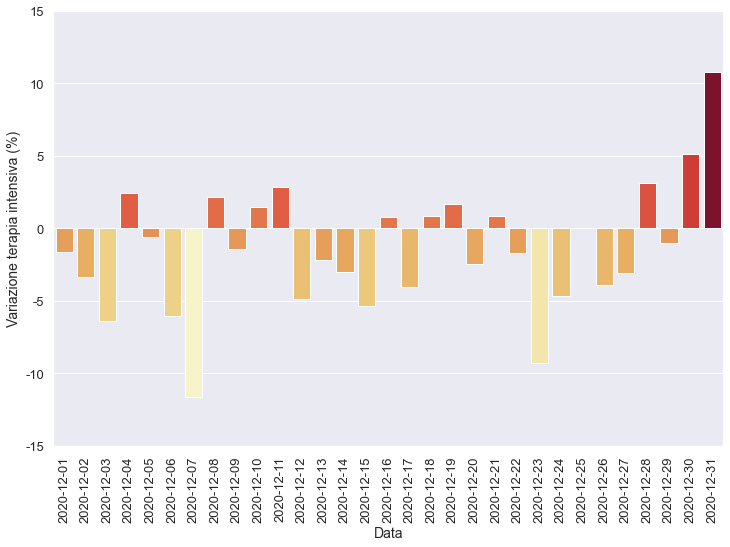

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

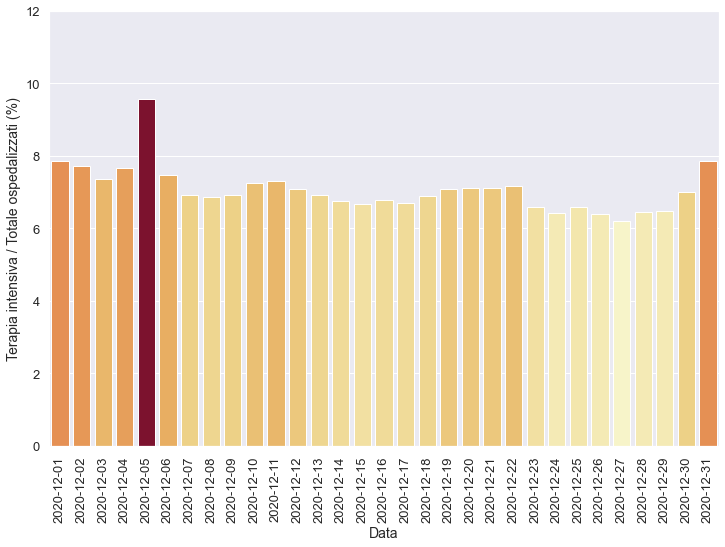

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

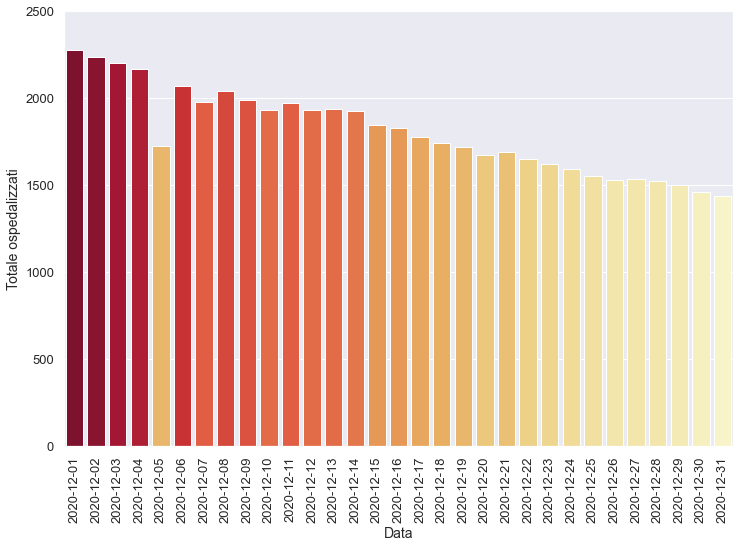

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

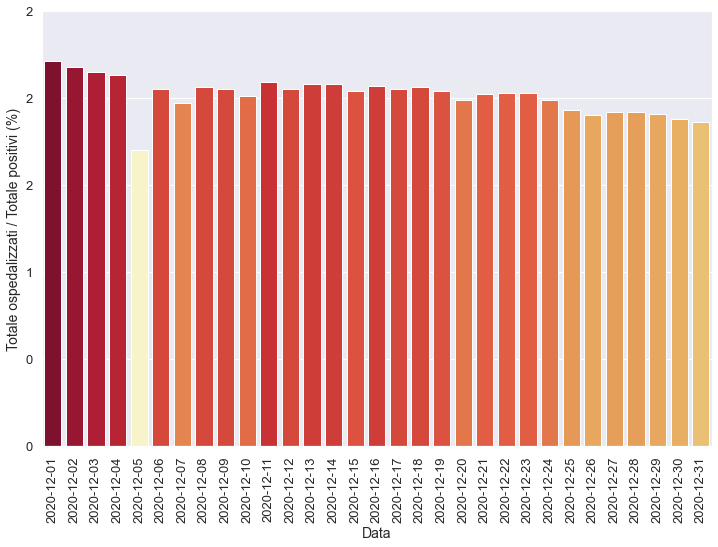

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

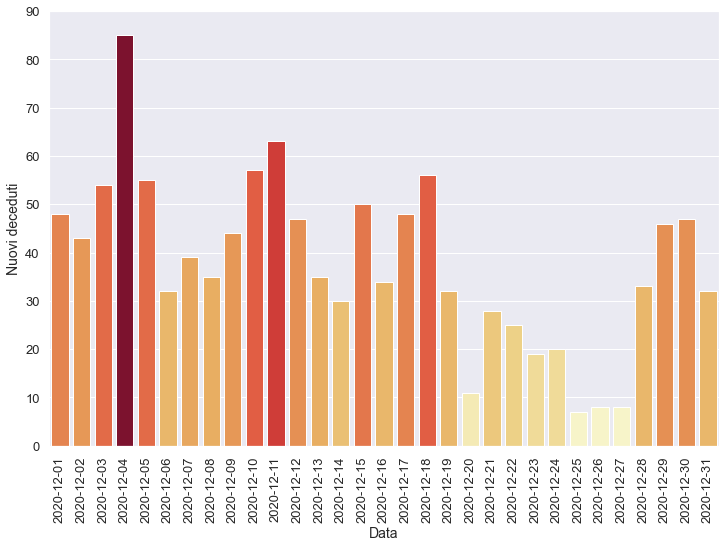

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

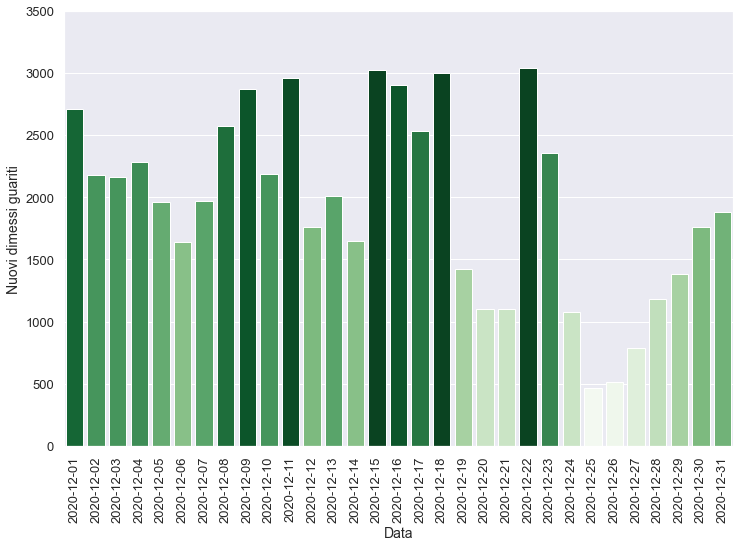

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-24T17:00:00,15,Campania,1488,102,1590,78419,80009,62,1156,...,20.0,20404.0,13612.0,92.0,6.42,1.99,5.67,8.49,-4.67,0.08
1,2020-12-25T17:00:00,15,Campania,1449,102,1551,78996,80547,538,1009,...,7.0,16355.0,11689.0,577.0,6.58,1.93,6.17,8.63,0.00,0.67
2,2020-12-26T17:00:00,15,Campania,1431,98,1529,79034,80563,16,539,...,8.0,6446.0,2158.0,38.0,6.41,1.90,8.36,24.98,-3.92,0.02
3,2020-12-27T17:00:00,15,Campania,1440,95,1535,78540,80075,-488,310,...,8.0,3382.0,974.0,-494.0,6.19,1.92,9.17,31.83,-3.06,-0.61
4,2020-12-28T17:00:00,15,Campania,1422,98,1520,77776,79296,-779,433,...,33.0,4650.0,1967.0,-764.0,6.45,1.92,9.31,22.01,3.16,-0.97
5,2020-12-29T17:00:00,15,Campania,1402,97,1499,76992,78491,-805,625,...,46.0,6849.0,2413.0,-784.0,6.47,1.91,9.13,25.90,-1.02,-1.02
6,2020-12-30T17:00:00,15,Campania,1357,102,1459,76152,77611,-880,930,...,47.0,11985.0,7594.0,-840.0,6.99,1.88,7.76,12.25,5.15,-1.12
7,2020-12-31T17:00:00,15,Campania,1325,113,1438,75817,77255,-356,1554,...,32.0,19003.0,14271.0,-335.0,7.86,1.86,8.18,10.89,10.78,-0.46


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

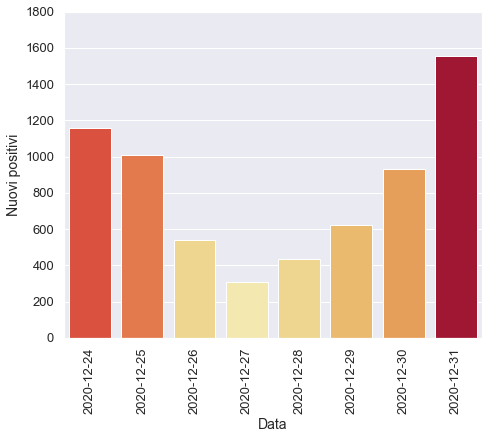

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

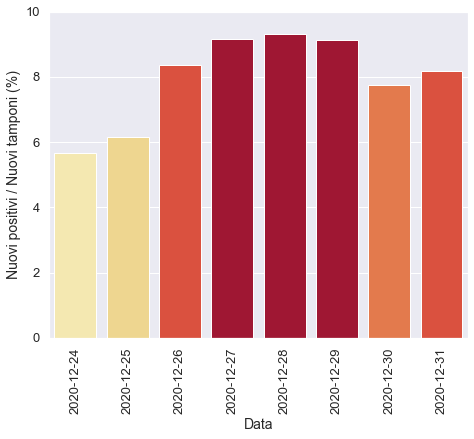

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

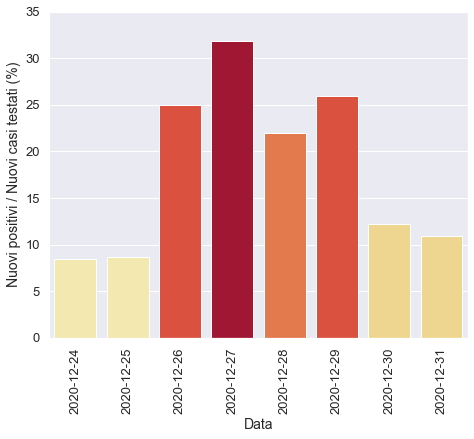

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

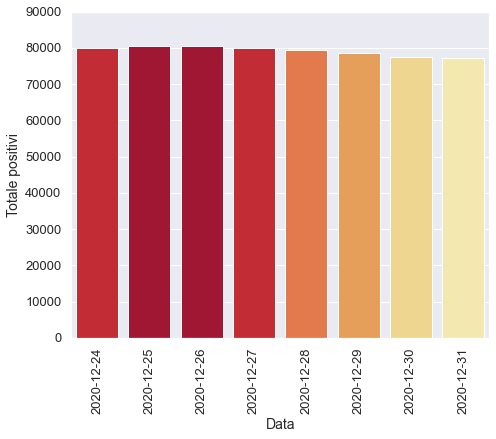

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

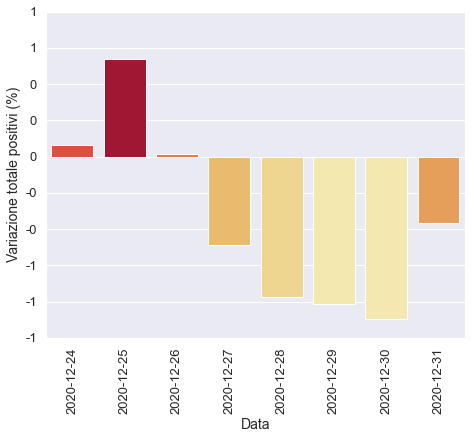

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

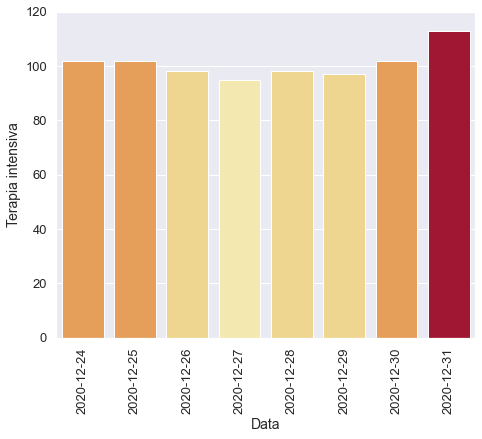

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

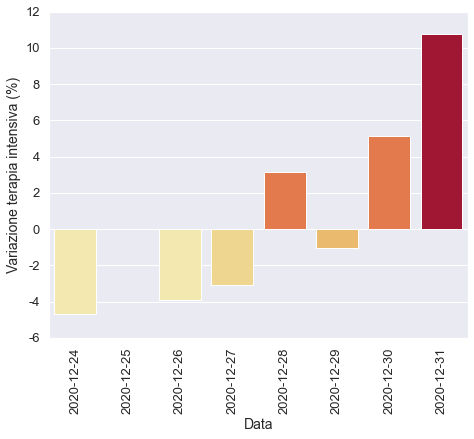

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

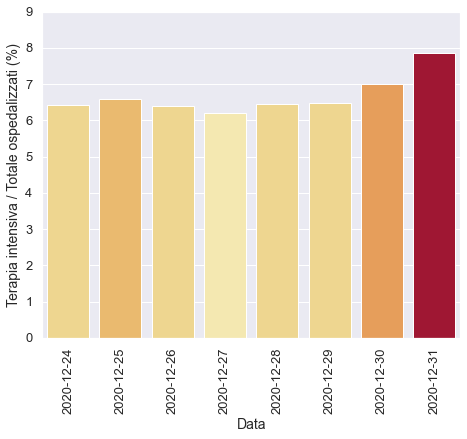

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

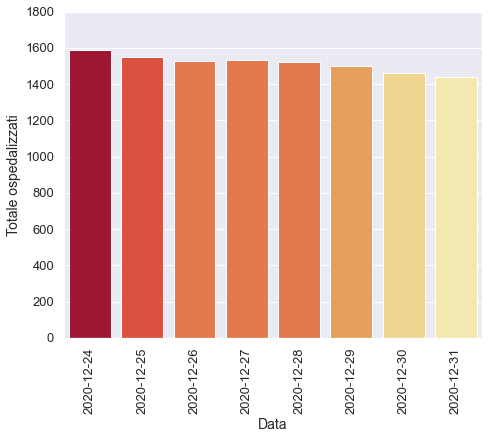

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

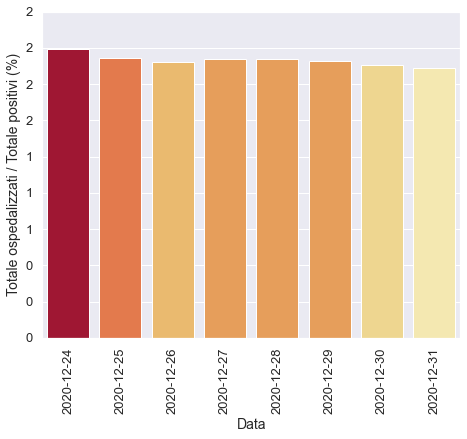

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

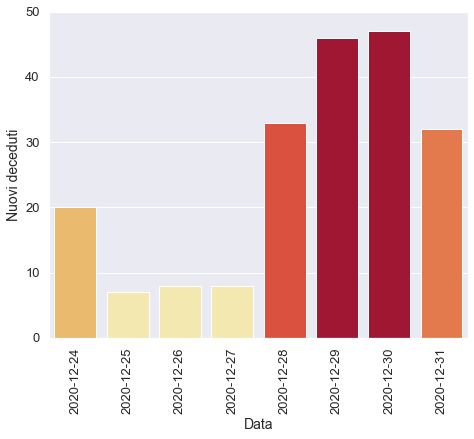

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

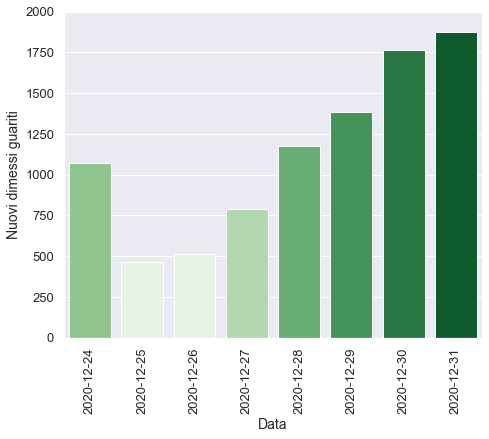

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)